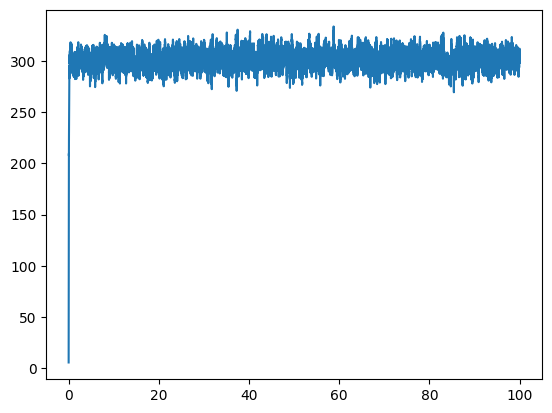

In [6]:
import numpy as np
import matplotlib.pylab as plt

Avogadro = 6.023e23
Boltzmann = 1.38e-23

def wallHitCheck(pos, vels, box):
   
    ndims = len(box)
    
    for i in range(ndims):
        vels[(pos[:,i] <= box[i][0]) | (pos[:,i] >= box[i][1])] *= -1
    

def integrate(pos, vels, forces, mass, dt):
   
    pos += vels * dt
    vels += forces * dt / mass[np.newaxis].T
    

def computeForce(mass, vels, temp, relax, dt):
    
    natoms, ndims = vels.shape
    
    sigma = np.sqrt(2.0 * mass * temp * Boltzmann / (relax * dt))
    noise = np.random.randn(natoms, ndims) * sigma[np.newaxis].T
    
    force = - vels * mass[np.newaxis].T / relax + noise
    
    return force

def run(**args):

    natoms, box, dt, temp = args['natoms'], args['box'], args['dt'], args['temp']
    mass, relax, nsteps = args['mass'], args['relax'], args['steps']

    mass = np.ones(natoms)* mass / Avogadro
    ndims = len(box)

    pos = np.random.rand(natoms, ndims)
    vels = np.random.rand(natoms, ndims)

    for i in range(ndims):
        pos[:,i] = box[i][0] + (box[i][1] - box[i][0]) * pos[:,i]

    step = 0
    output = []

    while step <= nsteps:

        step += 1

        forces = computeForce(mass, vels, temp, relax, dt)

        integrate(pos, vels, forces, mass, dt)

        wallHitCheck(pos, vels, box)

        inst_temp = np.sum(np.dot(mass, (vels - vels.mean(axis=0))**2))/(Boltzmann * 3 * natoms)

        output.append([dt*step, inst_temp])

    return np.array(output)

if __name__ == '__main__':

    params = {
        'natoms': 1000,
        'radius': 12e-12,
        'mass': 1e-3,
        'dt': 1e-15,
        'relax':1e-13,
        'temp': 300,
        'steps': 100000,
        'freq': 100,
        'box': ((0, 1e-8), (0, 1e-8), (0, 1e-8)),
        'ofname': 'traj-hydrogen.trr'
        }
    output = run(**params)

    plt.plot(output[:,0] * 1e12, output[:,1])
                


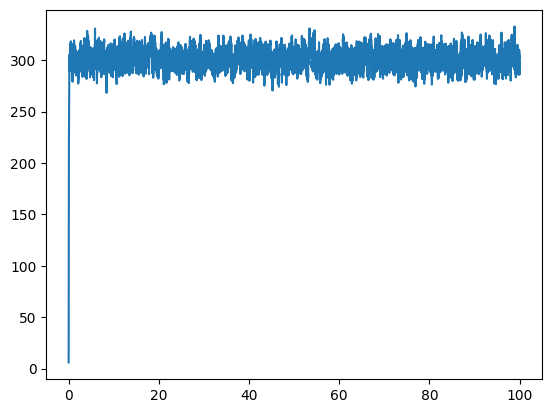

In [7]:
import numpy as np
import matplotlib.pylab as plt

Avogadro = 6.023e23
Boltzmann = 1.38e-23

def wallHitCheck(pos, vels, box):
   
    ndims = len(box)
    
    for i in range(ndims):
        vels[(pos[:,i] <= box[i][0]) | (pos[:,i] >= box[i][1])] *= -1

def leapfrog_position(pos, vels, acc, dt):
    
    pos += vels * dt + 0.5 * acc * dt**2
    return pos

def leapfrog_velocity(vels, acc, acc_new, dt):
   
    vels += 0.5 * (acc + acc_new) * dt
    return vels

def leapfrog(pos, vels, acc, dt, force, mass):
    
    # Update position (half-step velocity)
    pos = leapfrog_position(pos, vels, acc, dt)
    
    # Compute new acceleration
    acc_new = forces / mass[np.newaxis].T
    
    # Update velocity (full step)
    v = leapfrog_velocity(vels, acc, acc_new, dt)
    
    # Update acceleration
    acc = acc_new
    
    return pos, vels, acc    

def integrate(pos, vels, forces, mass, dt):
   
    pos += vels * dt
    vels += forces * dt / mass[np.newaxis].T
    

def computeForce(mass, vels, temp, relax, dt):
    
    natoms, ndims = vels.shape
    
    sigma = np.sqrt(2.0 * mass * temp * Boltzmann / (relax * dt))
    noise = np.random.randn(natoms, ndims) * sigma[np.newaxis].T
    
    force = - vels * mass[np.newaxis].T / relax + noise
    
    return force

def run(**args):

    natoms, box, dt, temp = args['natoms'], args['box'], args['dt'], args['temp']
    mass, relax, nsteps = args['mass'], args['relax'], args['steps']

    mass = np.ones(natoms)* mass / Avogadro
    ndims = len(box)

    pos = np.random.rand(natoms, ndims)
    vels = np.random.rand(natoms, ndims)

    for i in range(ndims):
        pos[:,i] = box[i][0] + (box[i][1] - box[i][0]) * pos[:,i]

    step = 0
    output = []

    while step <= nsteps:

        step += 1

        forces = computeForce(mass, vels, temp, relax, dt)

        integrate(pos, vels, forces, mass, dt)

        wallHitCheck(pos, vels, box)

        inst_temp = np.sum(np.dot(mass, (vels - vels.mean(axis=0))**2))/(Boltzmann * 3 * natoms)

        output.append([dt*step, inst_temp])

    return np.array(output)

if __name__ == '__main__':

    params = {
        'natoms': 1000,
        'radius': 12e-12,
        'mass': 1e-3,
        'dt': 1e-15,
        'relax':1e-13,
        'temp': 300,
        'steps': 100000,
        'freq': 100,
        'box': ((0, 1e-8), (0, 1e-8), (0, 1e-8)),
        'ofname': 'traj-hydrogen.trr'
        }
    output = run(**params)

    plt.plot(output[:,0] * 1e12, output[:,1])
                

# Example usage
#(if __name__ == "__main__":
    # Initialize parameters
   # x = np.array([0.0])  # position
   # v = np.array([1.0])  # velocity
   # a = np.array([0.0])  # acceleration
   # dt = 0.01  # time step
   # force = np.array([-1.0])  # force
   # mass = 1.0  # mass)
    
    # Perform Leapfrog simulation
    #( num_steps = 100
    # for i in range(num_steps):
     #   x, v, a = leapfrog(x, v, a, dt, force, mass)
     #   print(f"Step {i+1}: x = {x[0]:.4f}, v = {v[0]:.4f}, a = {a[0]:.4f}"))



In [10]:
import numpy as np
import matplotlib.pylab as plt
import trr

Avogadro = 6.023e23
Boltzmann = 1.38e-23

def wallHitCheck(pos, vels, box):
   
    ndims = len(box)
    
    for i in range(ndims):
        vels[(pos[:,i] <= box[i][0]) | (pos[:,i] >= box[i][1])] *= -1

def leapfrog_position(pos, vels, acc, dt):
    
    pos += vels * dt + 0.5 * acc * dt**2
    return pos

def leapfrog_velocity(vels, acc, acc_new, dt):
   
    vels += 0.5 * (acc + acc_new) * dt
    return vels

def leapfrog(pos, vels, acc, dt, force, mass):
    
    # Update position (half-step velocity)
    pos = leapfrog_position(pos, vels, acc, dt)
    
    # Compute new acceleration
    acc_new = forces / mass[np.newaxis].T
    
    # Update velocity (full step)
    v = leapfrog_velocity(vels, acc, acc_new, dt)
    
    # Update acceleration
    acc = acc_new
    
    return pos, vels, acc    

def integrate(pos, vels, forces, mass, dt):
   
    pos += vels * dt
    vels += forces * dt / mass[np.newaxis].T
    

def computeForce(mass, vels, temp, relax, dt):
    
    natoms, ndims = vels.shape
    
    sigma = np.sqrt(2.0 * mass * temp * Boltzmann / (relax * dt))
    noise = np.random.randn(natoms, ndims) * sigma[np.newaxis].T
    
    force = - vels * mass[np.newaxis].T / relax + noise
    
    return force

def run(**args):

    natoms, box, dt, temp = args['natoms'], args['box'], args['dt'], args['temp']
    mass, relax, nsteps = args['mass'], args['relax'], args['steps']
    ofname, freq, radius = args['ofname'], args['freq'], args['radius']
    
    ndims = len(box)
    pos = np.random.rand(natoms, ndims)
    

    for i in range(ndims):
        pos[:,i] = box[i][0] + (box[i][1] - box[i][0]) * pos[:,i]
    
    vels = np.random.rand(natoms, ndims)
    mass = np.ones(natoms)* mass / Avogadro
    radius = np.ones(natoms) * radius
    step = 0
    
    output = []

    while step <= nsteps:

        step += 1

        forces = computeForce(mass, vels, temp, relax, dt)

        integrate(pos, vels, forces, mass, dt)

        wallHitCheck(pos, vels, box)

        inst_temp = np.sum(np.dot(mass, (vels - vels.mean(axis=0))**2))/(Boltzmann * 3 * natoms)
        output.append([dt*step, inst_temp])
        
        if not step%freq:
            trr.writeOutput(ofname, natoms, step, box, ...)

    return np.array(output)

if __name__ == '__main__':

    params = {
        'natoms': 1000,
        'radius': 12e-12,
        'mass': 1e-3,
        'dt': 1e-15,
        'relax':1e-13,
        'temp': 300,
        'steps': 100000,
        'freq': 100,
        'box': ((0, 1e-8), (0, 1e-8), (0, 1e-8)),
        'ofname': 'traj-hydrogen.trr'
        }
    output = run(**params)

    plt.plot(output[:,0] * 1e12, output[:,1])




ModuleNotFoundError: No module named 'dump'

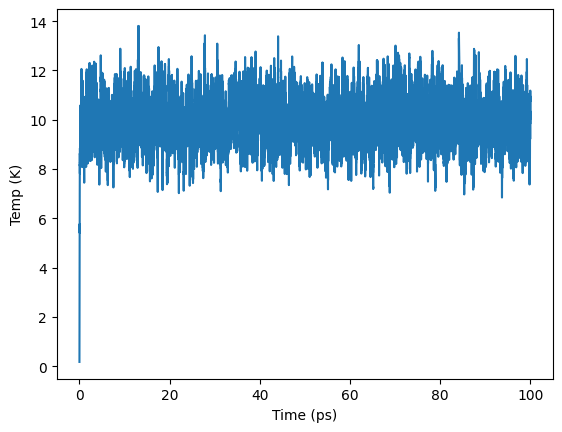

In [39]:
%run md.py

In [1]:
'''
Created on September 22, 2018
@author: Andrew Abi-Mansour
'''

# !/usr/bin/python
# -*- coding: utf8 -*-
# -------------------------------------------------------------------------
#
#   A simple molecular dynamics solver that simulates the motion
#   of non-interacting particles in the canonical ensemble using
#   a Langevin thermostat.
#
# --------------------------------------------------------------------------
#
#   This program is free software: you can redistribute it and/or modify
#   it under the terms of the GNU General Public License as published by
#   the Free Software Foundation, either version 2 of the License, or
#   (at your option) any later version.

#   This program is distributed in the hope that it will be useful,
#   but WITHOUT ANY WARRANTY; without even the implied warranty of
#   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#   GNU General Public License for more details.

#   You should have received a copy of the GNU General Public License
#   along with this program.  If not, see <http://www.gnu.org/licenses/>.

# -------------------------------------------------------------------------

import numpy as np
import matplotlib.pylab as plt
import dump

# Define global physical constants
Avogadro = 6.02214086e23
Boltzmann = 1.38064852e-23

def wallHitCheck(pos, vels, box):
    """ This function enforces reflective boundary conditions.
    All particles that hit a wall  have their velocity updated
    in the opposite direction.

    @pos: atomic positions (ndarray)
    @vels: atomic velocity (ndarray, updated if collisions detected)
    @box: simulation box size (tuple)
    """
    ndims = len(box)

    for i in range(ndims):
        vels[((pos[:,i] <= box[i][0]) | (pos[:,i] >= box[i][1])),i] *= -1

def integrate(pos, vels, forces, mass,  dt):
    """ A simple forward Euler integrator that moves the system in time 

    @pos: atomic positions (ndarray, updated)
    @vels: atomic velocity (ndarray, updated)
    """
    
    pos += vels * dt
    vels += forces * dt / mass[np.newaxis].T
    
def computeForce(mass, vels, temp, relax, dt):
    """ Computes the Langevin force for all particles

    @mass: particle mass (ndarray)
    @vels: particle velocities (ndarray)
    @temp: temperature (float)
    @relax: thermostat constant (float)
    @dt: simulation timestep (float)

    returns forces (ndarray)
    """

    natoms, ndims = vels.shape

    sigma = np.sqrt(2.0 * mass * temp * Boltzmann / (relax * dt))
    noise = np.random.randn(natoms, ndims) * sigma[np.newaxis].T

    force = - (vels * mass[np.newaxis].T) / relax + noise
    
    return force

def removeCOM(pos, mass):
    """ Removes center of mass motion. This function is not used. """
    pos -= np.dot(mass, pos) / mass.sum()

def run(**args):
    """ This is the main function that solves Langevin's equations for
    a system of natoms usinga forward Euler scheme, and returns an output
    list that stores the time and the temperture.
    
    @natoms (int): number of particles
    @temp (float): temperature (in Kelvin)
    @mass (float): particle mass (in Kg)
    @relax (float): relaxation constant (in seconds)
    @dt (float): simulation timestep (s)
    @nsteps (int): total number of steps the solver performs
    @box (tuple): simulation box size (in meters) of size dimensions x 2
    e.g. box = ((-1e-9, 1e-9), (-1e-9, 1e-9)) defines a 2D square
    @ofname (string): filename to write output to
    @freq (int): write output every 'freq' steps
    
    @[radius]: particle radius (for visualization)
    
    Returns a list (of size nsteps x 2) containing the time and temperature.
    
    """

    natoms, box, dt, temp = args['natoms'], args['box'], args['dt'], args['temp']
    mass, relax, nsteps   = args['mass'], args['relax'], args['steps']
    ofname, freq, radius = args['ofname'], args['freq'], args['radius']
    
    dim = len(box)
    pos = np.random.rand(natoms,dim)

    for i in range(dim):
        pos[:,i] = box[i][0] + (box[i][1] -  box[i][0]) * pos[:,i]

    vels = np.random.rand(natoms,dim)
    mass = np.ones(natoms) * mass / Avogadro
    radius = np.ones(natoms) * radius
    step = 0

    output = []

    while step <= nsteps:

        step += 1

        # Compute all forces
        forces = computeForce(mass, vels, temp, relax, dt)

        # Move the system in time
        integrate(pos, vels, forces, mass, dt)

        # Check if any particle has collided with the wall
        wallHitCheck(pos,vels,box)

        # Compute output (temperature)
        ins_temp = np.sum(np.dot(mass, (vels - vels.mean(axis=0))**2)) / (Boltzmann * dim * natoms)
        output.append([step * dt, ins_temp])
        
        if not step%freq:
            dump.writeOutput(ofname, natoms, step, box, radius=radius, pos=pos, v=vels)

    return np.array(output)

if __name__ == '__main__':

    params = {
        'natoms': 1000,
        'temp': 300,
        'mass': 0.001,
        'radius': 120e-12,
        'relax': 1e-13,
        'dt': 1e-15,
        'steps': 10000,
        'freq': 100,
        'box': ((0, 1e-8), (0, 1e-8), (0, 1e-8)),
        'ofname': 'traj-hydrogen-3D.dump'
        }

    output = run(**params)

    plt.plot(output[:,0] * 1e12, output[:,1])
    plt.xlabel('Time (ps)')
    plt.ylabel('Temp (K)')
    plt.show()

ModuleNotFoundError: No module named 'dump'

In [4]:
'''
Created on September 22, 2018
@author: Andrew Abi-Mansour
'''

# !/usr/bin/python
# -*- coding: utf8 -*-
# -------------------------------------------------------------------------
#
#   A simple molecular dynamics solver that simulates the motion
#   of non-interacting particles in the canonical ensemble using
#   a Langevin thermostat.
#
# --------------------------------------------------------------------------
#
#   This program is free software: you can redistribute it and/or modify
#   it under the terms of the GNU General Public License as published by
#   the Free Software Foundation, either version 2 of the License, or
#   (at your option) any later version.

#   This program is distributed in the hope that it will be useful,
#   but WITHOUT ANY WARRANTY; without even the implied warranty of
#   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#   GNU General Public License for more details.

#   You should have received a copy of the GNU General Public License
#   along with this program.  If not, see <http://www.gnu.org/licenses/>.

# -------------------------------------------------------------------------

import numpy as np

def writeOutput(filename, natoms, timestep, box, **data):
    """ Writes the output (in dump format) """
    
    axis = ('x', 'y', 'z')
    
    with open(filename, 'a') as fp:
        
        fp.write('ITEM: TIMESTEP\n')
        fp.write('{}\n'.format(timestep))
        
        fp.write('ITEM: NUMBER OF ATOMS\n')
        fp.write('{}\n'.format(natoms))
        
        fp.write('ITEM: BOX BOUNDS' + ' f' * len(box) + '\n')
        for box_bounds in box:
            fp.write('{} {}\n'.format(*box_bounds))

        for i in range(len(axis) - len(box)):
            fp.write('0 0\n')
            
        keys = list(data.keys())
        
        for key in keys:
            isMatrix = len(data[key].shape) > 1
            
            if isMatrix:
                _, nCols = data[key].shape
                
                for i in range(nCols):
                    if key == 'pos':
                        data['{}'.format(axis[i])] = data[key][:,i]
                    else:
                        data['{}_{}'.format(key,axis[i])] = data[key][:,i]
                        
                del data[key]
                
        keys = data.keys()
        
        fp.write('ITEM: ATOMS' + (' {}' * len(data)).format(*data) + '\n')
        
        output = []
        for key in keys:
            output = np.hstack((output, data[key]))
            
        if len(output):
            np.savetxt(fp, output.reshape((natoms, len(data)), order='F'))

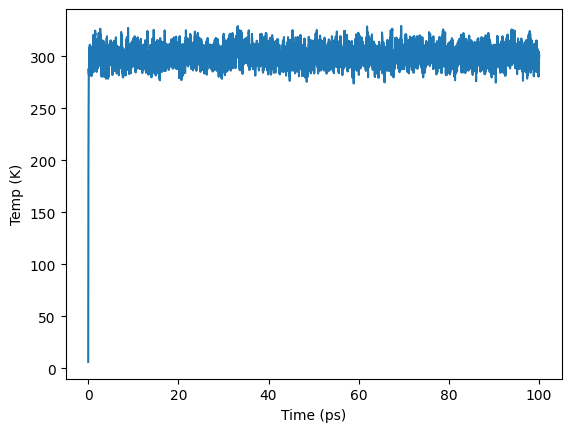

In [13]:
%run md.py

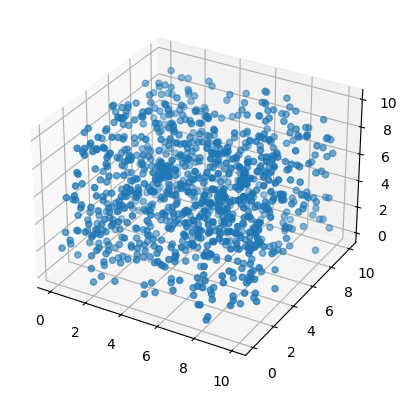

In [34]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def coordinate():
    x = [np.random.random()*box_width for i in range(n_particle)]
    y = [np.random.random()*box_width for i in range(n_particle)]
    z = [np.random.random()*box_width for i in range(n_particle)]
    
    return x, y, z


n_particle = 1000
box_width = 10

ax = plt.axes(projection='3d')

x, y, z = coordinate()


#fig = plt.plot(x, y, z, 'ro')
ax.scatter3D(x, y, z, 'ro')


plt.show()

In [35]:
pip



Usage:   
  C:\Users\bambi\AppData\Local\Programs\Python\Python312\python.exe -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute 

In [37]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.8 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.8 MB 2.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.8 MB 2.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.8 MB 2.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 3.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 3.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.7/1.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
 

In [40]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np

from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

#parameters
n = 5
D = 3
dt = 1e-15

r = 100.0*np.random.rand(n, D)  #initial random positions
v = 100.0*(np.random.rand(n, D)-0.5) #initial random velocities

def update(r, v, dt):
    r_new = r + v*dt
    return r_new

for i in range(10):
   r = update(r, v, dt)
   print(i)
   print(r)
   print(v)



0
[[21.80600239 50.39075985 68.81746117]
 [60.8886627  27.22063966 85.98241977]
 [17.78412171 15.93347049  0.17788621]
 [30.46902954 89.10044801  8.53032943]
 [ 0.11854993 88.61251556  6.68840791]]
[[-35.91425596  47.78083662  -7.74581674]
 [ 10.675585   -49.93354452  -6.99283356]
 [-24.55226761  -9.70426139 -34.77615463]
 [  7.59837826  20.1441665  -37.30510457]
 [ 18.88849257  -7.59716501  28.91074984]]
1
[[21.80600239 50.39075985 68.81746117]
 [60.8886627  27.22063966 85.98241977]
 [17.78412171 15.93347049  0.17788621]
 [30.46902954 89.10044801  8.53032943]
 [ 0.11854993 88.61251556  6.68840791]]
[[-35.91425596  47.78083662  -7.74581674]
 [ 10.675585   -49.93354452  -6.99283356]
 [-24.55226761  -9.70426139 -34.77615463]
 [  7.59837826  20.1441665  -37.30510457]
 [ 18.88849257  -7.59716501  28.91074984]]
2
[[21.80600239 50.39075985 68.81746117]
 [60.8886627  27.22063966 85.98241977]
 [17.78412171 15.93347049  0.17788621]
 [30.46902954 89.10044801  8.53032943]
 [ 0.11854993 88.6125155

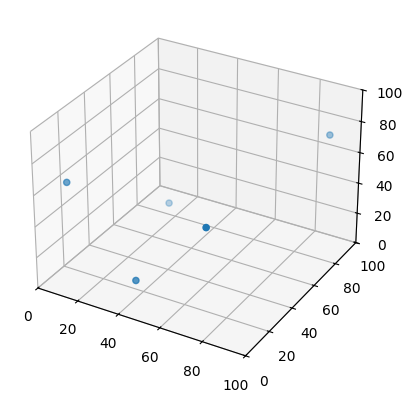

KeyboardInterrupt: 

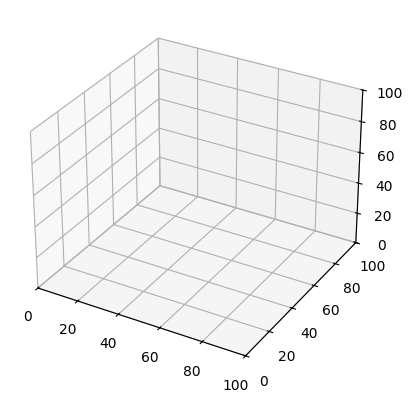

In [11]:
import numpy as np
from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

# Parameters
n = 5  # Number of particles
D = 3  # Dimension of space
dt = 0.01  # Time step
LL = 100  # Box size
BC = 0  # Boundary condition (uncommented this)

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL * np.random.rand(n, D)  # Initial random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initial random velocities

# Update function to calculate new positions
def update(r, v, dt):
    r_new = r + v * dt
    if BC == 0:
        r_new = (r + v * dt) % L  # Periodic boundary conditions
    return r_new, v  # Returning both r_new and v

# Plot setup
fig = plt.figure()

for i in range(1000):
    r, v = update(r, v, dt)  # Unpacking correctly, update returns (r_new, v)
    
    # Clear the plot before replotting
    plt.clf()
    
    # 3D scatter plot of particles
    ax = plt.axes(projection='3d')
    ax.set_xlim3d(0, L[0])
    ax.set_ylim3d(0, L[1])
    ax.set_zlim3d(0, L[2])
    
    ax.scatter3D(r[:, 0], r[:, 1], r[:, 2])  # Using r directly for scatter
    
    # Display updates
    display.clear_output(wait=True)
    display.display(pl.gcf())


KeyboardInterrupt: 

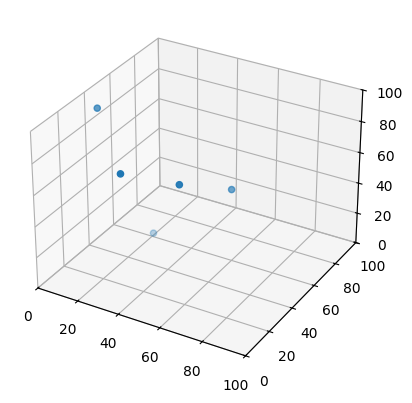

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

# Parameters
n = 5  # Number of particles
D = 3  # Dimension of space
dt = 0.01  # Time step
LL = 100  # Box size
BC = 1  # Boundary condition (uncommented this)

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL * np.random.rand(n, D)  # Initial random positions
v = 1000.0 * (np.random.rand(n, D) - 0.5)  # Initial random velocities

# Periodic boundary conditions
def reflectBC(r, v):
    r_new = 1.0*r
    v_new = 1.0*v
    for i in range(n):
        for j in range(D):
            if r[i][j]<0:
                r_new[i][j] = -r_new[i][j]
                v_new[i][j] = abs(v[i][j])
            if r[i][j]>L[j]:
                r_new[i][j] = 2.0*L[j] - r_new[i][j]
                v_new[i][j] = -abs(v[i][j])
    return r_new, v_new
    
# Update function to calculate new positions and velocities
def update(r, v, dt):
    r_new = r + v * dt  # Update positions based on velocity and time step
    r_new, v_new = reflectBC(r_new, v)  # Apply reflection boundary conditions
    return r_new, v_new  # Return updated positions and velocities

# Plot setup
fig = plt.figure()

for i in range(1000):
    r, v = update(r, v, dt)  # Unpacking correctly, update returns (r_new, v)
    
    # Clear the plot before replotting
    plt.clf()
    
    # 3D scatter plot of particles
    ax = plt.axes(projection='3d')
    ax.set_xlim3d(0, L[0])
    ax.set_ylim3d(0, L[1])
    ax.set_zlim3d(0, L[2])
    
    ax.scatter3D(r[:, 0], r[:, 1], r[:, 2])  # Using r directly for scatter
    
    # Display updates
    display.clear_output(wait=True)
    display.display(pl.gcf())


In [1]:
import numpy as np
import os  # Import os module to create directories
from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

# Parameters
n = 5  # Number of particles
D = 3  # Dimension of space
dt = 0.01  # Time step
LL = 100  # Box size
BC = 1  # Boundary condition

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL * np.random.rand(n, D)  # Initial random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initial random velocities

# Periodic boundary conditions
def reflectBC(r, v):
    r_new = 1.0 * r
    v_new = 1.0 * v
    for i in range(n):
        for j in range(D):
            if r[i][j] < 0:  # Reflect from the lower boundary
                r_new[i][j] = -r_new[i][j]
                v_new[i][j] = abs(v[i][j])
            if r[i][j] > L[j]:  # Reflect from the upper boundary
                r_new[i][j] = 2.0 * L[j] - r_new[i][j]
                v_new[i][j] = -abs(v[i][j])
    return r_new, v_new

# Update function to calculate new positions and velocities
def update(r, v, dt):
    r_new = r + v * dt  # Update positions based on velocity and time step
    r_new, v_new = reflectBC(r_new, v)  # Apply reflection boundary conditions
    return r_new, v_new  # Return updated positions and velocities

# Function to write dump files
def write_dump(r, t):
    # Create the 'dumps' directory if it doesn't exist
    if not os.path.exists("dumps"):
        os.makedirs("dumps")
    
    fname = "dumps/t" + str(t) + ".dump"
    with open(fname, "w") as f:  # Using 'with' to ensure the file is closed
        f.write("ITEM: TIMESTEP\n")
        f.write(str(t) + "\n")  # Time step
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(str(len(r)) + "\n")  # Number of atoms
        f.write("ITEM: BOX BOUNDS pp pp pp\n")  # pp = periodic boundary conditions
        f.write("0 " + str(L[0]) + "\n")
        f.write("0 " + str(L[1]) + "\n")
        f.write("0 " + str(L[2]) + "\n")
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i} {i} 1 {r[i][0]} {r[i][1]} {r[i][2]}\n")

# Simulation loop
for i in range(1000):
    r, v = update(r, v, dt)  # Update positions and velocities
    write_dump(r, int(i))  # Write the dump file for each time step



KeyboardInterrupt



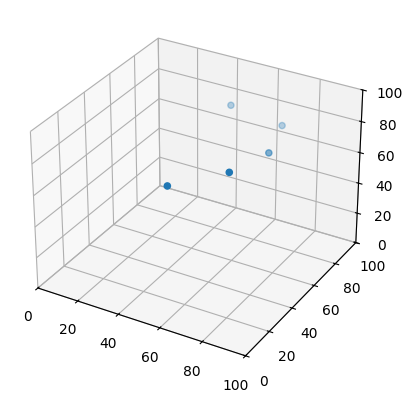

In [3]:
import numpy as np
import os  # Import os module to create directories
from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

# Parameters
n = 5  # Number of particles
D = 3  # Dimension of space
dt = 0.1  # Time step
LL = 100  # Box size
BC = 1  # Boundary condition
m = 1.0 

#leonard-jones parameter
eps = 1.0
sig = 1.0

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL * np.random.rand(n, D)  # Initial random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initial random velocities

# Periodic boundary conditions
def reflectBC(r, v):
    r_new = 1.0 * r
    v_new = 1.0 * v
    for i in range(n):
        for j in range(D):
            if r[i][j] < 0:  # Reflect from the lower boundary
                r_new[i][j] = -r_new[i][j]
                v_new[i][j] = abs(v[i][j])
            if r[i][j] > L[j]:  # Reflect from the upper boundary
                r_new[i][j] = 2.0 * L[j] - r_new[i][j]
                v_new[i][j] = -abs(v[i][j])
    return r_new, v_new

#L-J potential
def LJpot(r, i, sig, eps):
    drv = r - r[i] #distance
    drv = np.delete(drv, i, 0) #remove ith element
    dr = [np.sqrt((a[0])**2 + (a[1])**2 + (a[2])**2) for a in drv] #absolute distance
    r6 = (sig/np.array(dr))**6
    r12 = (sig/np.array(dr))**12
    LJP = 4.0*eps*sum(r12-r6)
    return LJP

def dLJp(r, i, sig, eps):
    drv = r - r[i] #distance
    drv = np.delete(drv, i, 0) #remove ith element
    dr = [np.sqrt((a[0])**2 + (a[1])**2 + (a[2])**2) for a in drv] #absolute distance
    r8 = (sig**6)/(dr**8)
    r14 = 2.0*(sig**12)/(dr**14)
    r814 = r14 - r8
    r814v = np.transpose(np.transpose(drv)*r814)
    r814vs = np.sum(r814v, axis=0)
    dLJp = 24.0*eps*(r814vs)
    return dLJp

def updatev(r, v, a, dt, sig, eps):
    F = -np.array([dLJp(r, i, sig, eps) for i in range(n)])
    a = F/m #acceleration
    v_new = v+a*dt
    return v_new, a 
    

# Update function to calculate new positions and velocities
def update(r, v, dt):
    r_new = r + v * dt  # Update positions based on velocity and time step
    if BC == 0:
        r_new = r_new%L
        v_new = 1.0*v
    if BC == 1:
        r_new, v_new = reflectBC(r_new, v)  # Apply reflection boundary conditions
    return r_new, v_new  # Return updated positions and velocities

# Plot setup
fig = plt.figure()

for i in range(1000):
    r, v = update(r, v, dt)  # Unpacking correctly, update returns (r_new, v)
    
    # Clear the plot before replotting
    plt.clf()
    
    # 3D scatter plot of particles
    ax = plt.axes(projection='3d')
    ax.set_xlim3d(0, L[0])
    ax.set_ylim3d(0, L[1])
    ax.set_zlim3d(0, L[2])
    
    ax.scatter3D(r[:, 0], r[:, 1], r[:, 2])  # Using r directly for scatter
    
    # Display updates
    display.clear_output(wait=True)
    display.display(pl.gcf())

In [23]:
import numpy as np
import os
from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

# Parameters
n = 50  # Number of particles
D = 3  # Dimension of space
dt = 0.0001  # Time step (reduced for better stability)
LL = 100  # Box size
BC = 1  # Boundary condition (1 for reflective)
m = [1.0, 10.0] 

# Leonard-Jones parameters
eps = 1.0
sig = 1.0

# Initialize particle types and masses
tp = [0]*n
for i in range(n):
    tp[i] = 0 if i < n / 2 else 1

mm = np.array([m[tp[i]] for i in range(n)])

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL * np.random.rand(n, D)  # Initial random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initial random velocities

# Reflective boundary conditions
def reflectBC(r, v):
    r_new = r.copy()
    v_new = v.copy()
    for i in range(n):
        for j in range(D):
            if r_new[i, j] < 0:
                r_new[i, j] = -r_new[i, j]
                v_new[i, j] = abs(v_new[i, j])
            elif r_new[i, j] > L[j]:
                r_new[i, j] = 2 * L[j] - r_new[i, j]
                v_new[i, j] = -abs(v_new[i, j])
    return r_new, v_new

# Lennard-Jones potential and force calculation
def LJpot(r, i, sig, eps):
    drv = r - r[i]  # distance vectors
    dr = np.linalg.norm(drv, axis=1)  # absolute distance
    dr = np.delete(dr, i)  # remove self-interaction
    r6 = (sig / dr)**6
    r12 = r6**2
    LJP = 4.0 * eps * np.sum(r12 - r6)
    return LJP

def dLJp(r, i, sig, eps):
    drv = r - r[i]  # distance vectors
    dr = np.linalg.norm(drv, axis=1)  # absolute distance
    dr = np.delete(dr, i)  # remove self-interaction
    drv = np.delete(drv, i, axis=0)  # corresponding vectors
    r8 = (sig**6) / (dr**8)
    r14 = (sig**12) / (dr**14)
    force = 24.0 * eps * (2 * r14 - r8)[:, np.newaxis] * drv
    return np.sum(force, axis=0)

def updatev(r, v, a, dt, sig, eps):
    F = -np.array([dLJp(r, i, sig, eps) for i in range(n)])  # Forces on all particles
    a = F / mm[:, np.newaxis]  # acceleration
    v_new = v + a * dt  # velocity update
    return v_new, a

# Update function to calculate new positions and velocities
def update(r, v, dt):
    r_new = r + v * dt  # Update positions based on velocity and time step
    if BC == 1:
        r_new, v_new = reflectBC(r_new, v)  # Apply reflective boundary conditions
    else:
        r_new = r_new % L  # Apply periodic boundaries if needed
        v_new = v
    return r_new, v_new  # Return updated positions and velocities

# Function to write dump files
def write_dump(r, t):
    if not os.path.exists("dumps_new"):
        os.makedirs("dumps_new")
    
    fname = f"dumps_new/t{t}.dump"
    with open(fname, "w") as f:
        f.write("ITEM: TIMESTEP\n")
        f.write(f"{t}\n")  # Time step
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(f"{len(r)}\n")  # Number of atoms
        f.write("ITEM: BOX BOUNDS pp pp pp\n")  # pp = periodic boundary conditions
        f.write(f"0 {L[0]}\n0 {L[1]}\n0 {L[2]}\n")
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i} {i} {tp[i]} {r[i, 0]:.6f} {r[i, 1]:.6f} {r[i, 2]:.6f}\n")

# Simulation loop
for i in range(10000):
    r, v = update(r, v, dt)  # Update positions and velocities
    
    # Save every 100 steps
    if i % 100 == 0:
        write_dump(r, i)


In [29]:
import numpy as np
import os
from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

# Constants
kb = 1.0  # Boltzmann constant (in reduced units)

# Parameters
n = 50  # Number of particles
D = 3  # Dimension of space
dt = 0.01  # Time step (reduced for better stability)
LL = 100  # Box size
BC = 1  # Boundary condition (1 for reflective)
m = [1.0, 10.0] 
T0 = 300  # Target temperature

# Leonard-Jones parameters
eps = 1.0
sig = 1.0

# Initialize particle types and masses
tp = [0]*n
for i in range(n):
    tp[i] = 0 if i < n / 2 else 1

mm = np.array([m[tp[i]] for i in range(n)])

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL * np.random.rand(n, D)  # Initial random positions
v = 100.0 * (np.random.rand(n, D) - 0.5)  # Initial random velocities

# Reflective boundary conditions
def reflectBC(r, v):
    r_new = r.copy()
    v_new = v.copy()
    for i in range(n):
        for j in range(D):
            if r_new[i, j] < 0:
                r_new[i, j] = -r_new[i, j]
                v_new[i, j] = abs(v_new[i, j])
            elif r_new[i, j] > L[j]:
                r_new[i, j] = 2 * L[j] - r_new[i, j]
                v_new[i, j] = -abs(v_new[i, j])
    return r_new, v_new

# Lennard-Jones potential and force calculation
def LJpot(r, i, sig, eps):
    drv = r - r[i]  # distance vectors
    dr = np.linalg.norm(drv, axis=1)  # absolute distance
    dr = np.delete(dr, i)  # remove self-interaction
    r6 = (sig / dr)**6
    r12 = r6**2
    LJP = 4.0 * eps * np.sum(r12 - r6)
    return LJP

def dLJp(r, i, sig, eps):
    drv = r - r[i]  # distance vectors
    dr = np.linalg.norm(drv, axis=1)  # absolute distance
    dr = np.delete(dr, i)  # remove self-interaction
    drv = np.delete(drv, i, axis=0)  # corresponding vectors
    r8 = (sig**6) / (dr**8)
    r14 = (sig**12) / (dr**14)
    force = 24.0 * eps * (2 * r14 - r8)[:, np.newaxis] * drv
    return np.sum(force, axis=0)

# Leapfrog method for positions
def leapfrog_position(r, v, a, dt):
    r_new = r + v * dt + 0.5 * a * (dt**2)
    return r_new

# Leapfrog method for velocities
def leapfrog_velocity(v, a, a_new, dt):
    v_new = v + 0.5 * (a + a_new) * dt
    return v_new

# Full Leapfrog integration step
def leapfrog(r, v, a, dt):
    # Update position
    r = leapfrog_position(r, v, a, dt)
    
    # Compute new acceleration
    F = -np.array([dLJp(r, i, sig, eps) for i in range(n)])  # Forces on all particles
    a_new = F / mm[:, np.newaxis]  # acceleration
    
    # Update velocity (full step)
    v = leapfrog_velocity(v, a, a_new, dt)
    
    return r, v, a_new  # Return updated positions, velocities, and accelerations

# Rescale temperature
def rescaleT(v, T):
    KE = 0.5 * np.sum(mm * np.sum(v**2, axis=1))  # Total kinetic energy
    avKE = KE / n  # Average kinetic energy per particle
    Tnow = (2.0 / 3.0) * avKE / kb  # Current temperature
    lam = np.sqrt(T / Tnow)  # Scaling factor
    lam = (lam - 1.0) * 0.5 + 1.0  # Slow update to temperature
    vnew = lam * v
    return vnew

# Function to write dump files
def write_dump(r, t):
    if not os.path.exists("dumps_300"):
        os.makedirs("dumps_300")
    
    fname = f"dumps_300/t{t}.dump"
    with open(fname, "w") as f:
        f.write("ITEM: TIMESTEP\n")
        f.write(f"{t}\n")  # Time step
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(f"{len(r)}\n")  # Number of atoms
        f.write("ITEM: BOX BOUNDS ff ff ff\n")  # Reflective boundary conditions
        f.write(f"0 {L[0]}\n0 {L[1]}\n0 {L[2]}\n")
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i} {i} {tp[i]} {r[i, 0]} {r[i, 1]} {r[i, 2]}\n")

# Initialize acceleration (initial forces)
F_init = -np.array([dLJp(r, i, sig, eps) for i in range(n)])
a = F_init / mm[:, np.newaxis]  # Acceleration at t=0

# Simulation loop
skip = 20
STEPS = 50 * skip

for i in range(STEPS):
    # Leapfrog integration step to update r, v, and a
    r, v, a = leapfrog(r, v, a, dt)
    
    # Rescale velocities every 'skip' steps to maintain temperature
    if i % skip == 0:
        v = rescaleT(v, T0)
    
    # Apply reflective boundary conditions after position update
    if BC == 1:
        r, v = reflectBC(r, v)
    
    # Write dump file every 'skip' steps
    if i % skip == 0:
        write_dump(r, int(i / skip))
        print(int(i/skip))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [29]:
import numpy as np
import os
from mpl_toolkits import mplot3d
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

# Constants
kb = 1.0  # Boltzmann constant (in reduced units)

# Parameters
n = 20  # Number of particles
D = 3  # Dimension of space
dt = 0.001  # Time step (reduced for better stability)
LL = 100  # Box size
BC = 1  # Boundary condition (1 for reflective)
m = [1.0, 1.0] 
T0 = 10  # Target temperature

# Leonard-Jones parameters
eps = 1.0
sig = 1.0

# Initialize particle types and masses
tp = [0]*n
for i in range(n):
    tp[i] = 0 if i < n / 2 else 1

mm = np.array([m[tp[i]] for i in range(n)])

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL*np.random.rand(n, D)  # Initial random positions
v = LL*(np.random.rand(n, D) - 0.5)  # Initial random velocities

# Reflective boundary conditions
def reflectBC(r, v):
    r_new = r.copy()
    v_new = v.copy()
    for i in range(n):
        for j in range(D):
            if r_new[i, j] < 0:
                r_new[i, j] = -r_new[i, j]
                v_new[i, j] = abs(v_new[i, j])
            elif r_new[i, j] > L[j]:
                r_new[i, j] = 2 * L[j] - r_new[i, j]
                v_new[i, j] = -abs(v_new[i, j])
    return r_new, v_new

# Lennard-Jones potential and force calculation
def LJpot(r, i, sig, eps):
    drv = r - r[i]  # distance vectors
    dr = np.linalg.norm(drv, axis=1)  # absolute distance
    dr = np.delete(dr, i)  # remove self-interaction
    r6 = (sig / dr)**6
    r12 = r6**2
    LJP = 4.0 * eps * np.sum(r12 - r6)
    return LJP

def dLJp(r, i, sig, eps):
    drv = r - r[i]  # distance vectors
    dr = np.linalg.norm(drv, axis=1)  # absolute distance
    dr = np.delete(dr, i)  # remove self-interaction
    drv = np.delete(drv, i, axis=0)  # corresponding vectors
    r8 = (sig**6) / (dr**8)
    r14 = (sig**12) / (dr**14)
    force = 24.0 * eps * (2 * r14 - r8)[:, np.newaxis] * drv
    return np.sum(force, axis=0)

# Leapfrog method for positions
def leapfrog_position(r, v, a, dt):
    r_new = r + v * dt + 0.5 * a * (dt**2)
    return r_new

# Leapfrog method for velocities
def leapfrog_velocity(v, a, a_new, dt):
    v_new = v + 0.5 * (a + a_new) * dt
    return v_new

# Full Leapfrog integration step
def leapfrog(r, v, a, dt):
    # Update position
    r = leapfrog_position(r, v, a, dt)
    
    # Compute new acceleration
    F = -np.array([dLJp(r, i, sig, eps) for i in range(n)])  # Forces on all particles
    a_new = F / mm[:, np.newaxis]  # acceleration
    
    # Update velocity (full step)
    v = leapfrog_velocity(v, a, a_new, dt)
    
    return r, v, a_new  # Return updated positions, velocities, and accelerations

# Rescale temperature
def rescaleT(v, T):
    KE = 0.5 * np.sum(mm * np.sum(v**2, axis=1))  # Total kinetic energy
    avKE = KE / n  # Average kinetic energy per particle
    Tnow = (2.0 / 3.0) * avKE / kb  # Current temperature
    lam = np.sqrt(T / Tnow)  # Scaling factor
    lam = (lam - 1.0) * 0.5 + 1.0  # Slow update to temperature
    vnew = lam * v
    return vnew

# Function to write dump files
def write_dump(r, t):
    if not os.path.exists("dumps_10"):
        os.makedirs("dumps_10")
    
    fname = f"dumps_10/t{t}.dump"
    with open(fname, "w") as f:
        f.write("ITEM: TIMESTEP\n")
        f.write(f"{t}\n")  # Time step
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(f"{len(r)}\n")  # Number of atoms
        f.write("ITEM: BOX BOUNDS ff ff ff\n")  # Reflective boundary conditions
        f.write(f"0 {L[0]}\n0 {L[1]}\n0 {L[2]}\n")
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i} {i} {tp[i]} {r[i, 0]} {r[i, 1]} {r[i, 2]}\n")

# Initialize acceleration (initial forces)
F_init = -np.array([dLJp(r, i, sig, eps) for i in range(n)])
a = F_init / mm[:, np.newaxis]  # Acceleration at t=0

# Simulation loop
skip = 20
STEPS = 500 * skip

for i in range(STEPS):
    # Leapfrog integration step to update r, v, and a
    r, v, a = leapfrog(r, v, a, dt)
    
    # Rescale velocities every 'skip' steps to maintain temperature
    if i % skip == 0:
        v = rescaleT(v, T0)
    
    # Apply reflective boundary conditions after position update
    if BC == 1:
        r, v = reflectBC(r, v)
    
    # Write dump file every 'skip' steps
    if i % skip == 0:
        write_dump(r, int(i / skip))
        print(int(i/skip))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [32]:
import numpy as np
import os

# Constants
kb = 0.8314459920816467  # Boltzmann constant in useful units
NA = 6.0221409e+26  # Avogadro's constant x 1000 (g->kg)
ech = 1.60217662E-19  # Electron charge in coulombs
kc = 8.9875517923E9 * NA * 1E30 * ech * ech / 1E24  # Electrostatic constant in Daltons, electron charges, picosecond, angstrom units

# Interaction parameters
epss = [[3.24, 14.2723], [14.2723, 62.87]]  # Lennard-Jones epsilon
sigg = [[0.98, 2.04845], [2.04845, 3.1169]]  # Lennard-Jones sigma
Kr = 148000.0 / 2  # Spring constant for bond length
bl = 0.9611  # Bond length
Kth = 35300.0 / 2  # Bending potential constant
th0 = 109.47 * np.pi / 180.0  # Bond angle in radians

# Parameters
n = 20  # Number of particles
D = 3  # Dimension of space
dt = 0.001  # Time step
LL = 100  # Box size
BC = 1  # Boundary condition (1 for reflective)
m = [1.0, 16.0]  # Masses of particle types
T0 = 300  # Target temperature

# Initialize particle types and masses
tp = [0] * n
for i in range(n):
    tp[i] = 0 if i < n / 2 else 1

mm = np.array([m[tp[i]] for i in range(n)])

# Initialize molecules (every group of 3 atoms forms a molecule)
mols = np.array([i // 3 for i in range(n)])

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL*np.random.rand(n, D)  # Initial random positions
v = LL*(np.random.rand(n, D) - 0.5)  # Initial random velocities

# Bonds (groups of 3 atoms are connected)
bnd = []
for i in range(int(n / 3)):
    bnd.append([3 * i, 3 * i + 1, bl, Kr]) 
    bnd.append([3 * i + 1, 3 * i + 2, bl, Kr])
bnd = np.array(bnd)

# Reflective boundary conditions
def reflectBC(r, v):
    r_new = r.copy()
    v_new = v.copy()
    for i in range(n):
        for j in range(D):
            if r_new[i, j] < 0:
                r_new[i, j] = -r_new[i, j]
                v_new[i, j] = abs(v_new[i, j])
            elif r_new[i, j] > L[j]:
                r_new[i, j] = 2 * L[j] - r_new[i, j]
                v_new[i, j] = -abs(v_new[i, j])
    return r_new, v_new

# Lennard-Jones potential and force calculation
def LJpot(r, i, sigg, epss):
    sg = np.array([sigg[tp[i]][tp[j]] for j in range(n)])
    ep = np.array([epss[tp[i]][tp[j]] for j in range(n)])
    for ii in range(n):  # Ignore atoms in the same molecule
        if mols[i] == mols[ii]:
            ep[ii] = 0
    drv = r - r[i]  # Distance in each dimension
    drv = np.delete(drv, i, 0)  # Remove self-LJ interactions
    dr = np.linalg.norm(drv, axis=1) + 1e-12 # Vectorized distance calculation
    r6 = (sg/dr)**6
    r12 = r6**2
    LJP = 4.0*ep*np.sum(r12 - r6)  # Lennard-Jones potential
    return LJP

def dLJp(r, i, sigg, epss, bnd):
    sg = np.array([sigg[tp[j]] for j in range(n)])
    ep = np.array([epss[tp[j]] for j in range(n)])
                              
    for ii in range(n):             # Ignore atoms in the same molecule
        if mols[i] == mols[ii]:
            ep[ii] = 0
    
    ep = np.delete(ep, i)       # Remove self-interaction (particle i) from epsilons
    sg = np.delete(sg, i)  # Ensure `sg` also excludes self
    drv = r - r[i] # Compute distance vectors and delete self-interaction 
    drv = np.delete(drv, i, 0)  # (n-1, D), remove i-th row
    dr = np.linalg.norm(drv, axis=1) + 1e-12  # Compute distances 
    r8 = ep * (sg ** 6) * (1.0 / dr) ** 8 
    r14 = 2.0 * ep * (sg ** 12) * (1.0 / dr) ** 14  
    r8v = drv * r8[:, np.newaxis]  # Element-wise multiplication
    r14v = drv * r14[:, np.newaxis]  # 
    r8vs = np.sum(r8v, axis=0) 
    r14vs = np.sum(r14v, axis=0)  
    dLJP = 24.0 * (r14vs - r8vs) 
    return dLJP

# Bond length potential
def BEpot(r, bnd):
    bps = np.zeros(n)
    for i in range(n):  
        for j in range(len(bnd)): 
            if bnd[j][0] == i or bnd[j][1] == i:
                ii = int(bnd[j][1]) if bnd[j][0] == i else int(bnd[j][0])
                dr0, e0 = bnd[j][2], bnd[j][3]
                dr = r[i] - r[ii]
                adr = np.linalg.norm(dr)
                BE = e0 * (adr - dr0) ** 2
                bps[i] += BE
    return bps

# Gradient of bond length potential
def dBEpot(r, bnd):
    bps = np.zeros([n, D])
    for i in range(n):
        for j in range(len(bnd)):
            if bnd[j][0] == i or bnd[j][1] == i:
                ii = int(bnd[j][1]) if bnd[j][0] == i else int(bnd[j][0])
                dr0, e0 = bnd[j][2], bnd[j][3]
                dr = r[i] - r[ii]
                adr = np.linalg.norm(dr)
                dBE = 2.0 * e0 * (adr - dr0) * dr / adr
                bps[i] += dBE
    return bps

# Leapfrog method for positions
def leapfrog_position(r, v, a, dt):
    return r + v * dt + 0.5 * a * (dt ** 2)

# Leapfrog method for velocities
def leapfrog_velocity(v, a, a_new, dt):
    return v + 0.5 * (a + a_new) * dt

# Full Leapfrog integration step
def leapfrog(r, v, a, dt):
    r = leapfrog_position(r, v, a, dt)  # Update position
    F_LJ = -np.array([dLJp(r, i, sigg[tp[i]], epss[tp[i]], bnd) for i in range(n)])  # Lennard-Jones force
    F_bond = -dBEpot(r, bnd)  # Bond force
    F = F_LJ + F_bond   # Total force
    a_new = F / mm[:, np.newaxis]  # Bond forces
    
    v = leapfrog_velocity(v, a, a_new, dt)  # Update velocity
    return r, v, a_new  # Return updated positions, velocities, and accelerations

# Rescale temperature
def rescaleT(v, T):
    KE = 0.5 * np.sum(mm * np.sum(v ** 2, axis=1))  # Total kinetic energy
    avKE = KE / n  # Average kinetic energy per particle
    Tnow = (2.0 / 3.0) * avKE / kb  # Current temperature
    lam = np.sqrt(T / Tnow)  # Scaling factor
    return lam * v

# Function to write dump files
def write_dump(r, t):
    if not os.path.exists("dumps_1000"):
        os.makedirs("dumps_1000")
    fname = f"dumps_1000/t{t}.dump"
    with open(fname, "w") as f:
        f.write("ITEM: TIMESTEP\n")
        f.write(f"{t}\n")  # Time step
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(f"{len(r)}\n")  # Number of atoms
        f.write("ITEM: BOX BOUNDS ff ff ff\n")  # Reflective boundary conditions
        f.write(f"0 {L[0]}\n0 {L[1]}\n0 {L[2]}\n")
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i} {mols[i]} {tp[i]} {r[i, 0]} {r[i, 1]} {r[i, 2]}\n")

# Initialize acceleration (initial forces)
F_LJ_init = -np.array([dLJp(r, i, sigg[tp[i]], epss[tp[i]], bnd) for i in range(n)]) #LJ
F_bond_init = -dBEpot(r,bnd)
F_init = F_LJ_init+F_bond_init
a = F_init / mm[:, np.newaxis]   # Acceleration at t=0

# Simulation loop
skip = 20
STEPS = 50 * skip

for i in range(STEPS):
    # Leapfrog integration step to update r, v, and a
    r, v, a = leapfrog(r, v, a, dt)
    
    # Rescale velocities every 'skip' steps to maintain temperature
    if i % skip == 0:
        v = rescaleT(v, T0)
    
    # Apply reflective boundary conditions after position update
    if BC == 1:
        r, v = reflectBC(r, v)
    
    # Write dump file every 'skip' steps
    if i % skip == 0:
        write_dump(r, int(i / skip))
        print(int(i/skip))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [15]:
import numpy as np
import os
import math

# Constants
kb = 0.8314459920816467  # Boltzmann constant in useful units
NA = 6.0221409e+26  # Avogadro's constant x 1000 (g->kg)
ech = 1.60217662E-19  # Electron charge in coulombs
kc = 8.9875517923E9 * NA * 1E30 * ech * ech / 1E24  # Electrostatic constant in Daltons, electron charges, picosecond, angstrom units

# Interaction parameters
epss = [[3.24, 14.2723], [14.2723, 62.87]]  # Lennard-Jones epsilon
sigg = [[0.98, 2.04845], [2.04845, 3.1169]]  # Lennard-Jones sigma
Kr = 148000.0 / 2  # Spring constant for bond length
bl = 0.9611  # Bond length
Kth = 35300.0 / 2  # Bending potential constant
th0 = 109.47 * np.pi / 180.0  # Bond angle in radians

# Parameters
n = 51  # Number of particles
D = 3  # Dimension of space
dt = 0.001  # Time step
LL = 100  # Box size
BC = 1  # Boundary condition (1 for reflective)
m = [1.0, 16.0]  # Masses of particle types
T0 = 300  # Target temperature
qs=[0.41,-0.82] #charges of particles

# Initialize particle types and masses
#tp = [0] * n
#for i in range(n):
#    tp[i] = 0 if i < n / 2 else 1

#mm = np.array([m[tp[i]] for i in range(n)])

# Initialize molecules (every group of 3 atoms forms a molecule)
#mols = np.array([i // 3 for i in range(n)])

# Set dimension to system, all set to LL
L = np.zeros([D]) + LL

# Initial random positions and velocities
r = LL*np.random.rand(n, D)  # Initial random positions
v = LL*(np.random.rand(n, D) - 0.5)  # Initial random velocities

# Bonds (groups of 3 atoms are connected)
bnd = []
for i in range(int(n / 3)):
    bnd.append([3 * i, 3 * i + 1, bl, Kr]) 
    bnd.append([3 * i + 1, 3 * i + 2, bl, Kr])
bnd = np.array(bnd)

#angles
angs=[]
for i in range(int(n/3)):
    angs.append([3*i,3*i+1,3*i+2,th0,Kth])
angs=np.array(angs)

#Types in groups of three
tp=[0]*n
for i in range(int(n/3)):
    tp[3*i]=0
    tp[3*i+1]=1
    tp[3*i+2]=0

#molecule labels
mols=[0]*n
for i in range(int(n/3)):
    mols[3*i]=i
    mols[3*i+1]=i
    mols[3*i+2]=i

#mass and charge arrays
mm=np.array([m[tp[j]] for j in range(n)])
chrg=np.array([qs[tp[j]] for j in range(n)])

# Reflective boundary conditions
def reflectBC(r, v):
    r_new = r.copy()
    v_new = v.copy()
    for i in range(n):
        for j in range(D):
            if r_new[i, j] < 0:
                r_new[i, j] = -r_new[i, j]
                v_new[i, j] = abs(v_new[i, j])
            elif r_new[i, j] > L[j]:
                r_new[i, j] = 2 * L[j] - r_new[i, j]
                v_new[i, j] = -abs(v_new[i, j])
    return r_new, v_new

# Lennard-Jones potential and force calculation
def LJpot(r, i, sigg, epss):
    sg = np.array([sigg[tp[i]][tp[j]] for j in range(n)])
    ep = np.array([epss[tp[i]][tp[j]] for j in range(n)])
    for ii in range(n):  # Ignore atoms in the same molecule
        if mols[i] == mols[ii]:
            ep[ii] = 0
    drv = r - r[i]  # Distance in each dimension
    drv = np.delete(drv, i, 0)  # Remove self-LJ interactions
    dr = np.linalg.norm(drv, axis=1) + 1e-12  # Vectorized distance calculation
    r6 = (sg/dr)**6
    r12 = r6**2
    LJP = 4.0*ep*np.sum(r12 - r6)  # Lennard-Jones potential
    return LJP

def dLJp(r, i, sigg, epss, bnd):
    sg = np.array([sigg[tp[j]] for j in range(n)])
    ep = np.array([epss[tp[j]] for j in range(n)])
                              
    for ii in range(n):             # Ignore atoms in the same molecule
        if mols[i] == mols[ii]:
            ep[ii] = 0
    
    ep = np.delete(ep, i)       # Remove self-interaction (particle i) from epsilons
    sg = np.delete(sg, i)  # Ensure `sg` also excludes self
    drv = r - r[i] # Compute distance vectors and delete self-interaction 
    drv = np.delete(drv, i, 0)  # (n-1, D), remove i-th row
    dr = np.linalg.norm(drv, axis=1) + 1e-12 # Compute distances 
    r8 = ep * (sg ** 6)*(1.0/np.array(dr))**8 
    r14 = 2.0 * ep * (sg ** 12)*(1.0/np.array(dr))**14  
    r8v = drv * r8[:, np.newaxis]  # Element-wise multiplication
    r14v = drv * r14[:, np.newaxis]  # 
    r8vs = np.sum(r8v, axis=0) 
    r14vs = np.sum(r14v, axis=0)  
    dLJP = 24.0 * (r14vs - r8vs) 
    return dLJP

# Bond length potential
def BEpot(r, bnd):
    bps = np.zeros(n)
    for i in range(n):  
        for j in range(len(bnd)): 
            if bnd[j][0] == i or bnd[j][1] == i:
                ii = int(bnd[j][1]) if bnd[j][0] == i else int(bnd[j][0])
                dr0, e0 = bnd[j][2], bnd[j][3]
                dr = r[i] - r[ii]
                adr = np.linalg.norm(dr)
                BE = e0 * (adr - dr0) ** 2
                bps[i] += BE
    return bps

# Gradient of bond length potential
def dBEpot(r, bnd):
    bps = np.zeros([n, D])
    for i in range(n):
        for j in range(len(bnd)):
            if bnd[j][0] == i or bnd[j][1] == i:
                ii = int(bnd[j][1]) if bnd[j][0] == i else int(bnd[j][0])
                dr0, e0 = bnd[j][2], bnd[j][3]
                dr = r[i] - r[ii]
                adr = np.linalg.norm(dr)
                dBE = 2.0 * e0 * (adr - dr0) * dr / adr
                bps[i] += dBE
    return bps
    
#gradient of bond angle potential (negative force)
def dBA(r, angs):
    aps = np.zeros([n, 3])
    for i in range(n):  # Loop over all particles
        for j in range(len(angs)):  # Check all bonds to see if particle i is bonded
            a1, a2, a3 = int(angs[j][0]), int(angs[j][1]), int(angs[j][2])
            th00, e0 = angs[j][3], angs[j][4]  # Equilibrium angle and bending modulus
            if i == a1 or i == a2 or i == a3:
                if i == a1 or i == a2:
                    r1 = r[a1] - r[a2]  # Bond vector 1
                    r2 = r[a3] - r[a2]  # Bond vector 2
                else:
                    r1 = r[a3] - r[a2]  # Bond vector 1
                    r2 = r[a1] - r[a2]  # Bond vector 2
                ar1, ar2 = np.linalg.norm(r1), np.linalg.norm(r2)
                dot = np.dot(r1, r2)
                ndot = dot / (ar1 * ar2)
                ndot = np.clip(ndot, -1.0, 1.0)  # Ensure ndot is within [-1, 1]
                th = math.acos(ndot)  # Bond angle, theta
                dUdth = -2.0 * e0 * (th - th00)  # -dU/dtheta
                
                # Forces
                if i == a1 or i == a3:
                    numerator = (r2 / (ar1 * ar2)) - (dot / (ar1 ** 3 * ar2 * 2.0))
                    epsilon = 1e-12  # Small tolerance to prevent division by zero
                    denominator = np.sqrt(1.0 - ndot ** 2) + epsilon  # Ensure denominator is not zero
                    if abs(ndot) >= 1.0:                                # Handle cases where the angle is 0 or 180 degrees
                        denominator = epsilon
    
                    dUdr = dUdth * numerator / denominator
                    aps[i] += dUdr
                if i == a2:
                    denominator = np.sqrt(1.0 - ndot ** 2)
                    n1 = -(r2 + r1)
                    n2 = dot * r1 / (ar1 ** 2)
                    n3 = dot * r2 / (ar2 ** 2)
                    numerator = (n1 + n2 + n3) / (ar1 * ar2)
                    dUdr = dUdth * numerator / denominator
                    aps[i] += dUdr
    return aps

#derivative of coulomb potential (negative force)
def coul(r,i,chrgs):
    q0=chrgs[i]
    qs=1.0*np.array(chrgs)
    for j in range(n):
        if mols[i]==mols[j]:
            qs[j]=0.0
    qs=np.delete(qs,i)
    drv=r-r[i] #distance in each dimension
    drv=np.delete(drv,i,0) #remove ith element (no self LJ interactions)
    dr = np.linalg.norm(drv, axis=1) + 1e-12 #absolute distance
    r3 = q0*qs*kc*((1.0/np.array(dr))**3.0)
    FF =np.transpose(np.transpose(drv)*r3)
    Fs=np.sum(FF,axis=0)
    return Fs

# Leapfrog method for positions
def leapfrog_position(r, v, a, dt):
    return r + v * dt + 0.5 * a * (dt ** 2)

# Leapfrog method for velocities
def leapfrog_velocity(v, a, a_new, dt):
    return v + 0.5 * (a + a_new) * dt

# Full Leapfrog integration step
def leapfrog(r, v, a, dt):
    r = leapfrog_position(r, v, a, dt)    #update position
    r = np.nan_to_num(r)
    F_LJ = -np.array([dLJp(r, i, sigg[tp[i]], epss[tp[i]], bnd) for i in range(n)])  # Lennard-Jones force
    F_bond = -dBEpot(r, bnd)  # Bond force
    F_angle = -dBA(r,angs) #bond angle potential
    F_coul = -np.array([coul(r,i,chrg) for i in range(n)]) #coulomb
    F = F_LJ + F_bond + F_angle + F_coul  # Total force
    a_new = F / mm[:, np.newaxis]  # Bond forces
    
    v = leapfrog_velocity(v, a, a_new, dt) #update velocity
    v = np.nan_to_num(v)
    return r, v, a_new  # Return updated positions, velocities, and accelerations

# Rescale temperature
def rescaleT(v, T):
    KE = 0.5 * np.sum(mm * np.sum(v ** 2, axis=1))  # Total kinetic energy
    avKE = KE / n  # Average kinetic energy per particle
    Tnow = (2.0 / 3.0) * avKE / kb  # Current temperature
    lam = np.sqrt(T / Tnow)  # Scaling factor
    return lam * v

# Function to write dump files
def write_dump(r, v, t):
    if not os.path.exists("dumps_h2o"):
        os.makedirs("dumps_h2o")
    fname = f"dumps_h2o/t{t}.dump"
    with open(fname, "w") as f:
        f.write("ITEM: TIMESTEP\n")
        f.write(f"{t}\n")  # Time step
        f.write("ITEM: NUMBER OF ATOMS\n")
        f.write(f"{len(r)}\n")  # Number of atoms
        f.write("ITEM: BOX BOUNDS ff ff ff\n")  # Reflective boundary conditions
        f.write(f"0 {L[0]}\n0 {L[1]}\n0 {L[2]}\n")
        f.write("ITEM: ATOMS id mol type x y z\n")
        for i in range(len(r)):
            f.write(f"{i} {mols[i]} {tp[i]} {r[i, 0]} {r[i, 1]} {r[i, 2]} {v[i, 0]} {v[i, 1]} {v[i, 2]}\n")
        f.close


# Initialize acceleration (initial forces)
F_LJ_init = -np.array([dLJp(r, i, sigg[tp[i]], epss[tp[i]], bnd) for i in range(n)]) #LJ
F_bond_init = -dBEpot(r,bnd)
F_init_angle = -dBA(r,angs) 
F_init_coul = -np.array([coul(r,i,chrg) for i in range(n)])
F_init = F_LJ_init+F_bond_init+F_init_angle+F_init_coul
a = F_init / mm[:, np.newaxis]   # Acceleration at t=0

# Simulation loop
skip = 20
STEPS = 50 * skip

for i in range(STEPS):
    # Leapfrog integration step to update r, v, and a
    r, v, a = leapfrog(r, v, a, dt)
    
    # Rescale velocities every 'skip' steps to maintain temperature
    if i % skip == 0:
        v = rescaleT(v, T0)
    
    # Apply reflective boundary conditions after position update
    if BC == 1:
        r, v = reflectBC(r, v)
    
    # Write dump file every 'skip' steps
    if i % skip == 0:
        write_dump(r, v, int(i / skip))
        print(f"Timestep: {int(i/skip)}")
        #print("Positions (r):")
        #print(r)
        #print("Velocities (v):")
        #print(v)


Timestep: 0
Timestep: 1
Timestep: 2
Timestep: 3
Timestep: 4
Timestep: 5
Timestep: 6
Timestep: 7
Timestep: 8
Timestep: 9
Timestep: 10
Timestep: 11
Timestep: 12
Timestep: 13
Timestep: 14
Timestep: 15
Timestep: 16
Timestep: 17
Timestep: 18
Timestep: 19
Timestep: 20
Timestep: 21
Timestep: 22
Timestep: 23
Timestep: 24
Timestep: 25
Timestep: 26
Timestep: 27
Timestep: 28
Timestep: 29
Timestep: 30
Timestep: 31
Timestep: 32
Timestep: 33
Timestep: 34
Timestep: 35
Timestep: 36
Timestep: 37
Timestep: 38
Timestep: 39
Timestep: 40
Timestep: 41
Timestep: 42
Timestep: 43
Timestep: 44
Timestep: 45
Timestep: 46
Timestep: 47
Timestep: 48
Timestep: 49
